In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [126]:
cat_orders = ["full", "phono", "vowel", "consonant", "sonorant", "obstruent", "morpho", "syntax"]
feat_stats = pd.read_csv("../data/ling_feat_stats.csv", index_col=0).loc[cat_orders].iloc[::-1]
rand_stats = pd.read_csv("../data/ling_rand_feat_stats.csv", index_col=0).loc[cat_orders].iloc[::-1]
labels = [x.capitalize() for x in feat_stats.index.values]
labels = [{"Full": "All",
           "Phono": "Phonology", "Morpho": "Morphology", 
           "Vowel": "\u2001Vowel", "Consonant": "\u2001Consonant",
           "Sonorant": "\u2001Sonorant", "Obstruent": "\u2001Obstruent"
           }.get(x, x)
          for x in labels]
feat_stats.index = labels

In [127]:
feat_stats

,mean,std,median,Q95,Q05
Syntax,0.347671,0.031784,0.346305,0.407836,0.295362
Morphology,0.430814,0.023488,0.431962,0.467582,0.391830
Obstruent,0.567740,0.029086,0.572806,0.606004,0.516479
Sonorant,0.512463,0.027437,0.514575,0.555389,0.464539
Consonant,0.559916,0.024754,0.567040,0.592787,0.514609
Vowel,0.499212,0.035223,0.496155,0.558150,0.441031
Phonology,0.572864,0.024292,0.574855,0.607586,0.526364
All,0.545272,0.022863,0.545480,0.579367,0.510290


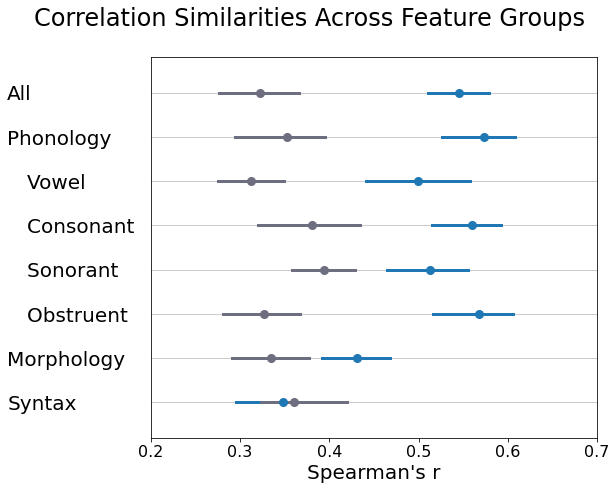

In [128]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
rand_color = '#6d6e80'

fig = plt.figure(figsize=(8,7))
yticks = np.arange(feat_stats.shape[0])

plt.plot(feat_stats["mean"], yticks, '.', markersize=16, zorder=100)
plt.plot(rand_stats["mean"], yticks, '.', markersize=16, zorder=100, color=rand_color)
plt.xlim([0.2,0.7])
plt.ylim(-0.8, 7.8)
for row_i in yticks:
    plt.axhline(row_i, color='#999', linewidth=0.5)
    q05 = feat_stats.iloc[row_i]["Q05"]
    q95 = feat_stats.iloc[row_i]["Q95"]
    r05 = rand_stats.iloc[row_i]["Q05"]
    r95 = rand_stats.iloc[row_i]["Q95"]
    plt.plot([q05, q95], [row_i, row_i], linewidth=3, color=colors[0])
    plt.plot([r05, r95], [row_i, row_i], linewidth=3, color=rand_color)
# plt.plot(feat_stats["mean"], yticks, '.', markersize=16)
plt.yticks(yticks, feat_stats.index, fontsize=20, ha="left")
plt.xticks(fontsize=16)
plt.gca().get_yaxis().set_tick_params(pad=140, width=0)
fig.suptitle("Correlation Similarities Across Feature Groups", fontsize=24, x=0.4)
plt.xlabel("Spearman's r", fontsize=20, y=-2)
fig.set_size_inches(8, 7)
fig.savefig("../data/figure/corrsim.png", bbox_inches="tight", dpi=300)